In [1]:
# Jhose Immanuel Sembiring
# 1103202047
# TK44G4
# Image-Classification_CIFAR10_CNN
# Dokumentasi ChatGPT : https://chatgpt.com/share/5833a1d1-669e-459c-abf8-41bc58998d66

#Library

In [2]:
# Mengimpor TensorFlow dan modul Keras dari TensorFlow
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

# Mengimpor Matplotlib untuk visualisasi gambar
import matplotlib.pyplot as plt

#Load Dataset CIFAR10

In [3]:
# Memuat dataset CIFAR-10 dari Keras
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai piksel gambar menjadi antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

170498071/170498071 [==============================] - 3s 0us/step


#Exploratory Data Analysis (EDA)

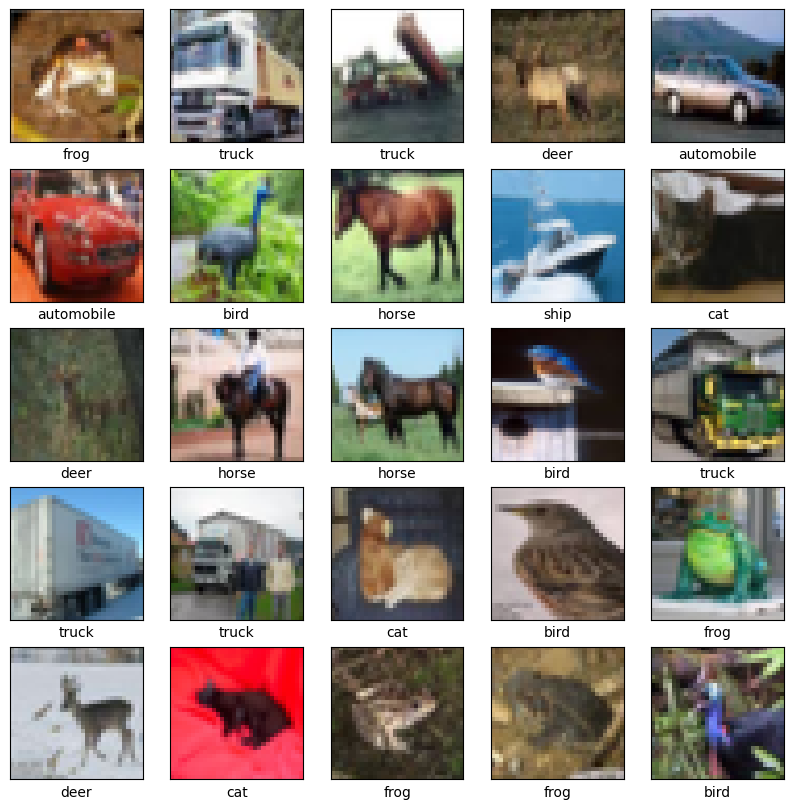

In [4]:
# Mendefinisikan nama kelas untuk setiap label
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Menampilkan 25 gambar pertama dari set pelatihan dan menampilkan nama kelas di bawah masing-masing gambar
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # Membuat grid 5x5 untuk gambar
    plt.xticks([]) # Menghapus ticks pada sumbu x
    plt.yticks([]) # Menghapus ticks pada sumbu y
    plt.grid(False) # Menghapus grid
    plt.imshow(train_images[i], cmap=plt.cm.binary) # Menampilkan gambar
    plt.xlabel(class_names[train_labels[i][0]]) # Menampilkan nama kelas di bawah gambar
plt.show() # Menampilkan plot

Pembuatan Model CNN

In [5]:
# Membuat model sequential
model = models.Sequential()

# Menambahkan lapisan konvolusi pertama dengan 32 filter, ukuran kernel 3x3, dan fungsi aktivasi ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Menambahkan lapisan pooling dengan ukuran 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan lapisan konvolusi kedua dengan 64 filter dan ukuran kernel 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Menambahkan lapisan pooling kedua dengan ukuran 2x2
model.add(layers.MaxPooling2D((2, 2)))

# Menambahkan lapisan konvolusi ketiga dengan 64 filter dan ukuran kernel 3x3
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Meratakan output dari lapisan sebelumnya menjadi vektor satu dimensi
model.add(layers.Flatten())

# Menambahkan lapisan dense dengan 64 unit dan fungsi aktivasi ReLU
model.add(layers.Dense(64, activation='relu'))

# Menambahkan lapisan output dengan 10 unit (satu untuk setiap kelas) tanpa fungsi aktivasi
model.add(layers.Dense(10))

#Ringkasan Model

In [6]:
# Menampilkan ringkasan model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

Menggabungkan Model

In [7]:
# Mengompilasi model dengan optimizer Adam, loss Sparse Categorical Crossentropy, dan metrik akurasi
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


#Melatih Model

In [8]:
# Melatih model dengan data pelatihan selama 10 epoch
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 [==============================] - 15s 5ms/step - loss: 1.5350 - accuracy: 0.4389 - val_loss: 1.2605 - val_accuracy: 0.5410
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.1755 - accuracy: 0.5842 - val_loss: 1.1055 - val_accuracy: 0.6102
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.0408 - accuracy: 0.6314 - val_loss: 1.0209 - val_accuracy: 0.6373
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9511 - accuracy: 0.6668 - val_loss: 0.9735 - val_accuracy: 0.6593
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8889 - accuracy: 0.6857 - val_loss: 1.0035 - val_accuracy: 0.6539
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.8322 - accuracy: 0.7075 - val_loss: 0.8800 - val_accuracy: 0.6996
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7894 - accuracy: 0.7248 - val_loss: 0.9008 - val_accuracy

#Evaluasi Model

In [9]:
# Mengevaluasi model dengan data pengujian
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Menampilkan akurasi pengujian
print(f'Test accuracy: {test_acc}')


313/313 - 1s - loss: 0.8931 - accuracy: 0.6981 - 863ms/epoch - 3ms/step
Test accuracy: 0.6980999708175659


#Visualisasi Hasil Training

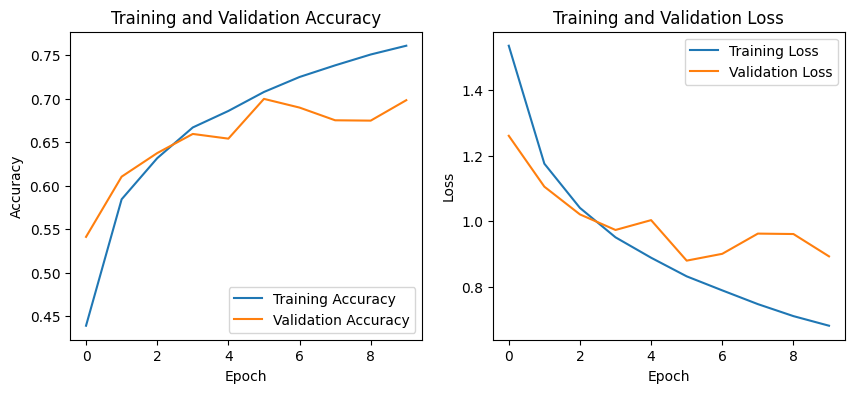

In [10]:
# Membuat plot untuk visualisasi hasil training
plt.figure(figsize=(10, 4))

# Plot untuk akurasi training dan validasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch') # Label sumbu x
plt.ylabel('Accuracy') # Label sumbu y
plt.legend(loc='lower right') # Menampilkan legenda di sudut kanan bawah
plt.title('Training and Validation Accuracy') # Judul plot

# Plot untuk loss training dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch') # Label sumbu x
plt.ylabel('Loss') # Label sumbu y
plt.legend(loc='upper right') # Menampilkan legenda di sudut kanan atas
plt.title('Training and Validation Loss') # Judul plot

# Menampilkan plot
plt.show()


Memprediksi Gambar Baru

1/1 [==============================] - 0s 315ms/step


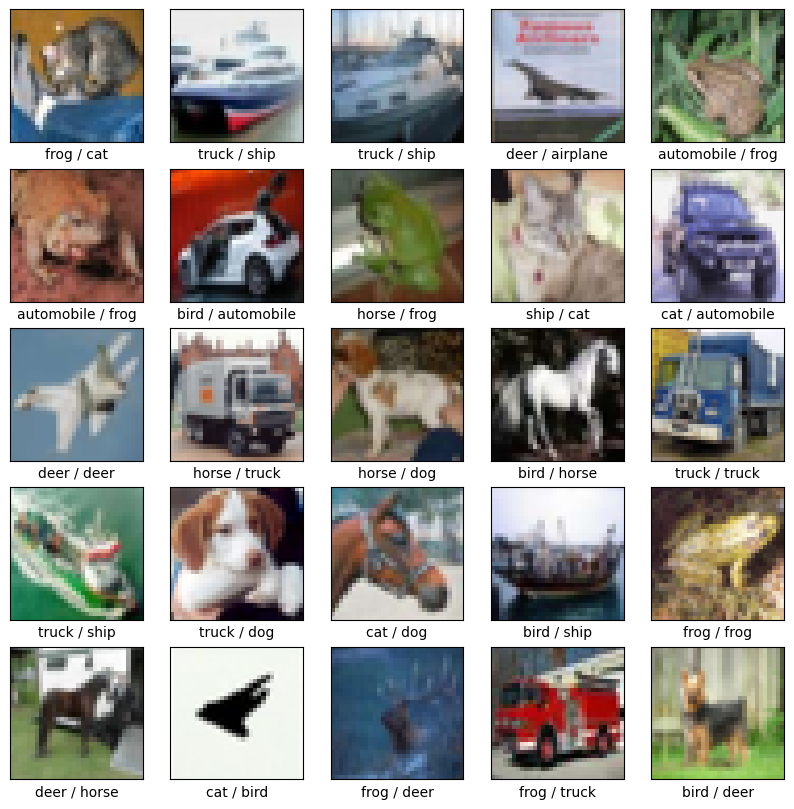

In [11]:
# Melakukan prediksi satu batch gambar dari set pengujian
predictions = model.predict(test_images[:25])

# Menampilkan hasil prediksi
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1) # Membuat grid 5x5 untuk gambar
    plt.xticks([]) # Menghapus ticks pada sumbu x
    plt.yticks([]) # Menghapus ticks pada sumbu y
    plt.grid(False) # Menghapus grid
    plt.imshow(test_images[i], cmap=plt.cm.binary) # Menampilkan gambar
    # Menampilkan nama kelas sebenarnya dan hasil prediksi di bawah gambar
    plt.xlabel(f"{class_names[train_labels[i][0]]} / {class_names[predictions[i].argmax()]}")
plt.show() # Menampilkan plot
